# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data and Basic Summary

### Data Loading and Validation Data Split
There is a class called "TrafficDataRealFileProviderAutoSplitValidationData" will load data from **"train.p"** and **"test.p"**, also parameters will help us split validation data from train.p
> below code will load from file and split trainging / validation set as 80/20
```python
from traffic.traffic_test_data_provider import TrafficDataRealFileProviderAutoSplitValidationData
original_data_provider = TrafficDataRealFileProviderAutoSplitValidationData(
            split_validation_from_train=True, validation_size=0.20)
```
> below code will load file from the file name you specific
```python
data_provider = TrafficDataRealFileProviderAutoSplitValidationData(
    training_file="your_train_file.p", testing_file="your_test_file.p",
    split_validation_from_train=True, validation_size=0.20)
```

### Data Augment and Preprocessing
Data process procedures are listed in [python file: traffic_data_enhance](../edit/traffic/traffic_data_enhance.py)

first all, it is clearly show that data had a class imbalance.
>highest count of sign names: 'Speed limit (50km/h)' **1800**

>lowest count of sign names: 'Go straight or left', **163**

>that's about **1100%** difference

##### The augment procedure I have
1. Random Rotation between -20 and 20 angles
2. Random Corp Image between 20% and 0.5%
3. Random Brightness and Contrast
I found out that by augment training data with 200% of max class(1800) with method 1 or 2, it can increae test accuracy by 2%.

Brightness and Contrast required lost of computing power, I implemented the code but haven't produce the data yet. will update this later.

### Data Normalisation
Data process procedures are listed in [python file: traffic_data_enhance](../edit/traffic/traffic_data_enhance.py)

Data normalisation helps with training optimisation

I have expirement below normalisation methods
1. No normalisation
2. [0..255] convert to [0..1]
3. [0..255] convert to [-1..1]
4. grayscale
5. tf.image.per_image_standardization (whitening)

No normalisation still gives a good score, but it make the training harder (took longer), as a example,
For LeNet(Basic) network, 
With normalisation 
EPOCH 50 training loss = 0.015 accuracy = 0.996 Validation loss = 0.083 accuracy = 0.990
Without 
EPOCH 50 training loss = 0.042 accuracy = 0.989 Validation loss = 0.116 accuracy = 0.983

### Methods and Scores

[LeNet(Basic) Structure in Source Code](https://github.com/JamesLuoau/Traffic-Sign-Recognition-with-Deep-Learning-CNN/blob/master/traffic/lenet.py) Filter 5x5x6 -> max pool (ksize=[2, 2], strides=[2, 2]) -> 5x5x16 -> max pool([2,2], [2,2]), full connected layer 400 -> 120 -> 84 -> 43

[LeNet(Adv) Structure in Source Code](https://github.com/JamesLuoau/Traffic-Sign-Recognition-with-Deep-Learning-CNN/blob/master/traffic/traffic_lenet_v8_108x200.py) Filter 5x5x108 -> max pool (ksize=[2, 2], strides=[2, 2]) -> 5x5x200 -> max pool([2,2], [2,2]), full connected layer 5000 -> 1000 -> 200 -> 43

| Score | Network     |Augment| Normalisation  |Learning Rate|Drop Out|Epoch|
| ------|-------------|-------|----------------|-------------|--------|-----|
| 0.900 | LeNet(Basic)|None   |None            |0.001        |None    |80   |
| 0.941 | LeNet(Basic)|None   |None            |0.001        |0.5     |80   |
| 0.946 | LeNet(Basic)|None   |standardization |0.001        |0.5     |80   |
| 0.946 | LeNet(Basic)|Rotate |standardization |0.001        |0.5     |80   |
| 0.949 | LeNet(Adv)  |None   |standardization |0.001        |0.3     |100  |
| 0.949 | LeNet(Adv)  |None   |standardization |0.001        |0.3     |100  |

In [2]:
from traffic.traffic_test_data_provider import TrafficDataRealFileProviderAutoSplitValidationData
from traffic.traffic_lenet import Lenet
from traffic.traffic_data import TrafficDataSets
from traffic.data_explorer import SignNames
from traffic.data_explorer import DataExplorer
from traffic.traffic_data_enhance import *
from IPython.display import Image
from traffic.traffic_lenet_v2 import LenetV2
from traffic.traffic_lenet_v3 import LenetV3
from traffic.traffic_lenet_v4 import LenetV4
from traffic.traffic_lenet_v5 import LenetV5
from traffic.traffic_net_inception import NetInception

%matplotlib inline

sign_names = SignNames("signnames.csv")
original_data_provider = TrafficDataRealFileProviderAutoSplitValidationData(
            split_validation_from_train=True, validation_size=0.20)
original_data_explorer = DataExplorer.from_data_provider(sign_names, original_data_provider)

print("orignal data loaded")

def augment_data_random_rotate(ratio):
    images, labels = enhance_with_random_rotate(original_data_provider.X_train, original_data_provider.y_train, ratio)
    provider = original_data_provider.to_other_provider(X_train_overwrite=images, y_train_overwrite=labels)
    return provider

rotated_data_provider = augment_data_random_rotate(1)
rotated_data_explorer = DataExplorer.from_data_provider(sign_names, rotated_data_provider)

print("random roated data loaded")

print("Original Data Summary")
print(original_data_explorer.summary())
print("Augmented Data Summary - Random Rotate")
print(rotated_data_explorer.summary())

orignal data loaded
random roated data loaded
Original Data Summary

        training data set: 
            examples:31367
            shape:(31367, 32, 32, 3)
        
        validation data set: 
            examples:7842
            shape:(7842, 32, 32, 3)
        
        testing data set: 
            examples:12630
            shape:(12630, 32, 32, 3)
        
        unique classes: 43
        
Augmented Data Summary - Random Rotate

        training data set: 
            examples:75612
            shape:(75612, 32, 32, 3)
        
        validation data set: 
            examples:7842
            shape:(7842, 32, 32, 3)
        
        testing data set: 
            examples:12630
            shape:(12630, 32, 32, 3)
        
        unique classes: 43
        


---

## Step 1: Dataset Summary & Exploration


In [2]:
def data_distribution(explorer):
    distribution = explorer.training_data_distribution()
    highest = explorer.highest_sign_names_count(distribution)
    distribution = explorer.training_data_distribution()
    lowest = explorer.lowest_sign_names_count(distribution)
    print("highest count of sign names:", highest)
    print("lowest count of sign names:", lowest)
    
    explorer.bar_chart_data_distribution(explorer.training_data_distribution(),
                                         "Training Data Distribution").show()
    explorer.bar_chart_data_distribution(explorer.validation_data_distribution(),
                                         "Validation Data Distribution").show()
    explorer.bar_chart_data_distribution(explorer.testing_data_distribution(),
                                         "Testing Data Distribution").show()



### Original Dataset Distribution


highest count of sign names: ('Speed limit (50km/h)', 1800)
lowest count of sign names: ('Go straight or left', 163)


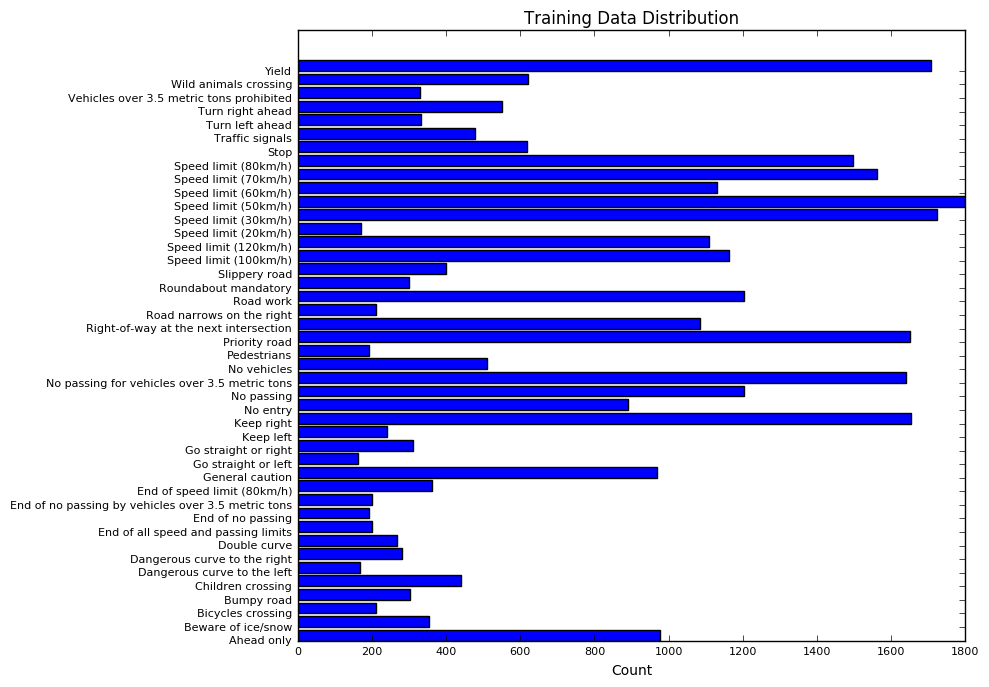

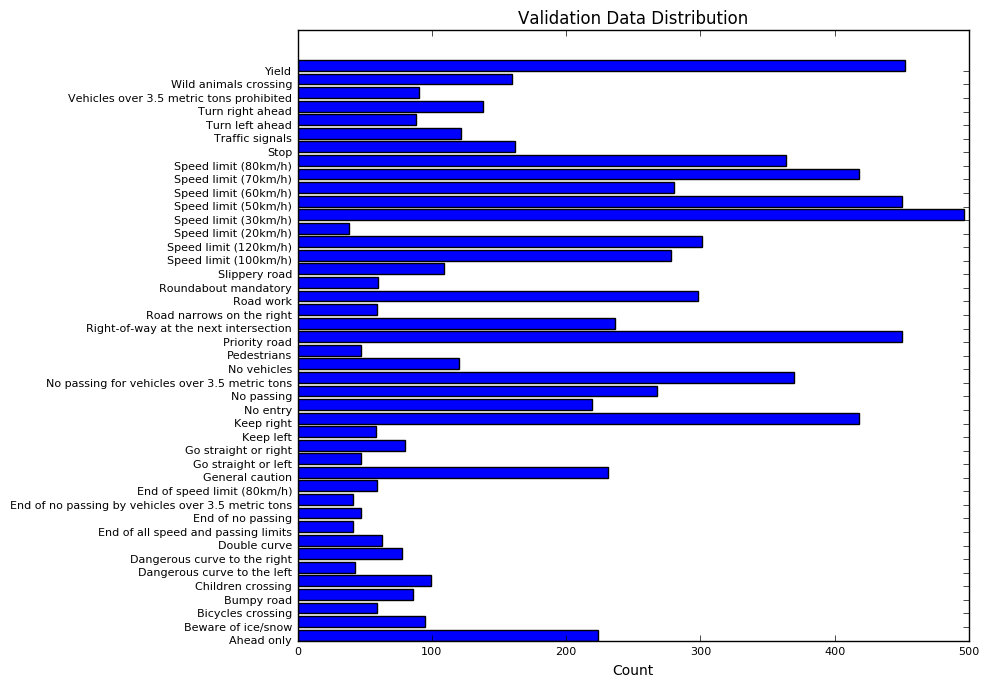

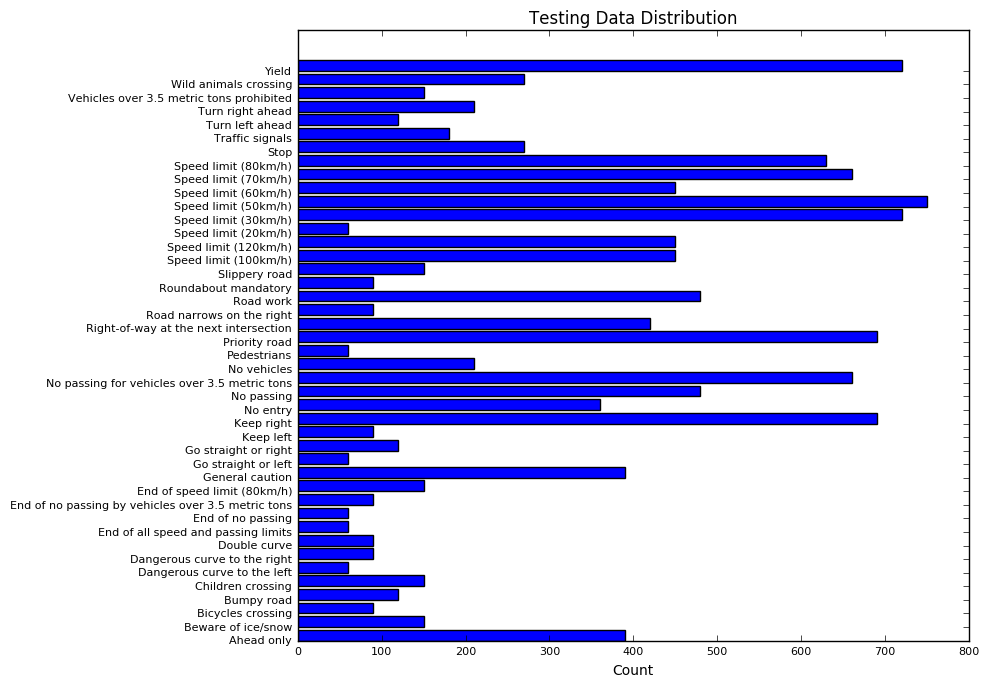

In [13]:
data_distribution_original_data(original_data_explorer)

### Random Rotated Dataset Distribution


highest count of sign names: ('No entry', 2673)
lowest count of sign names: ('General caution', 969)


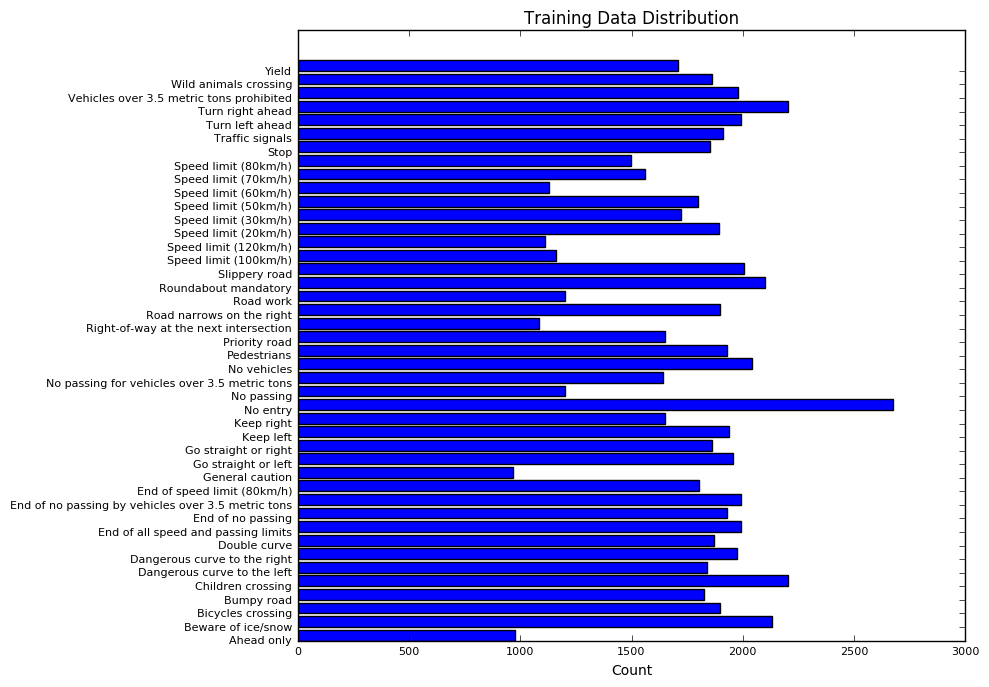

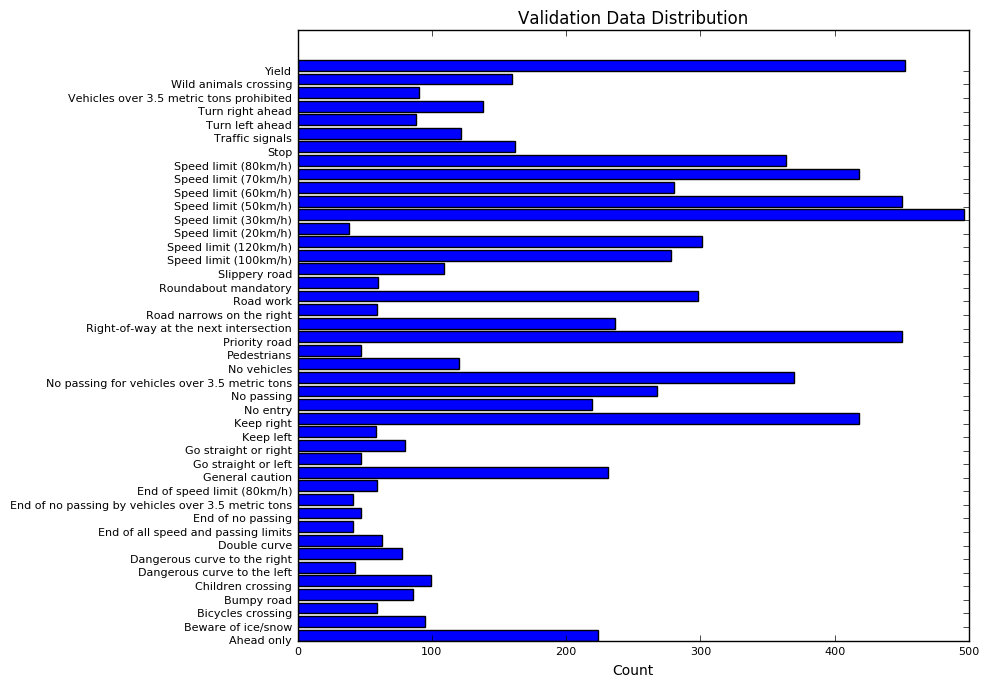

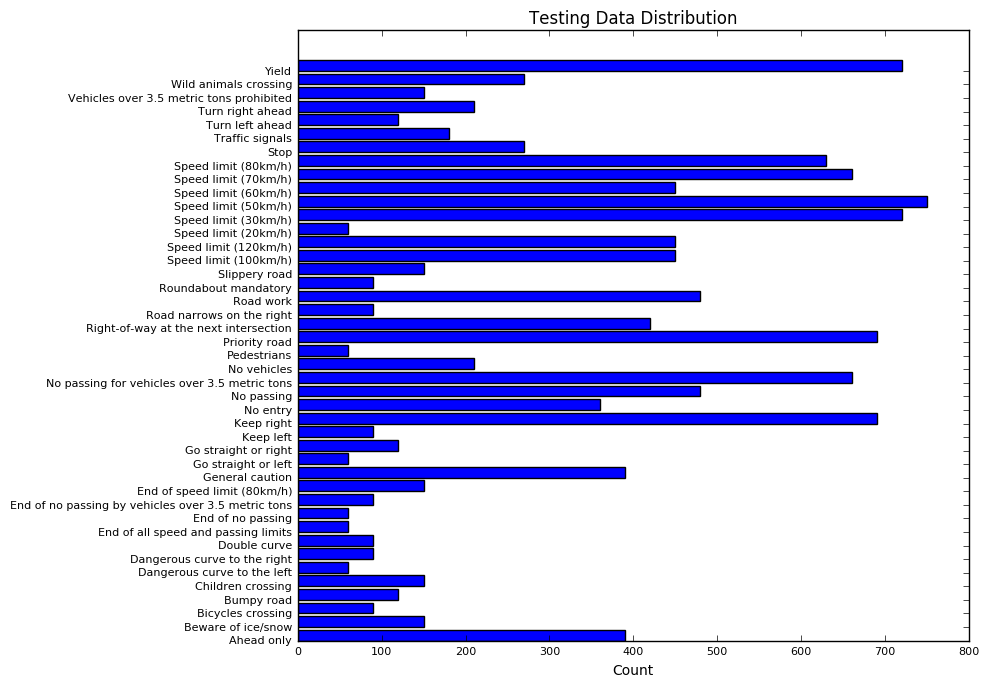

In [14]:
data_distribution_original_data(rotated_data_explorer)

### Sample Images

with DataExplorer class, you can sample all data with a slice

training data set samples


showing image : 100%|██████████| 10/10 [00:00<00:00, 819.95it/s]


validation data set samples


showing image : 100%|██████████| 10/10 [00:00<00:00, 710.62it/s]


testing data set samples


showing image : 100%|██████████| 10/10 [00:00<00:00, 479.75it/s]


<function matplotlib.pyplot.show>

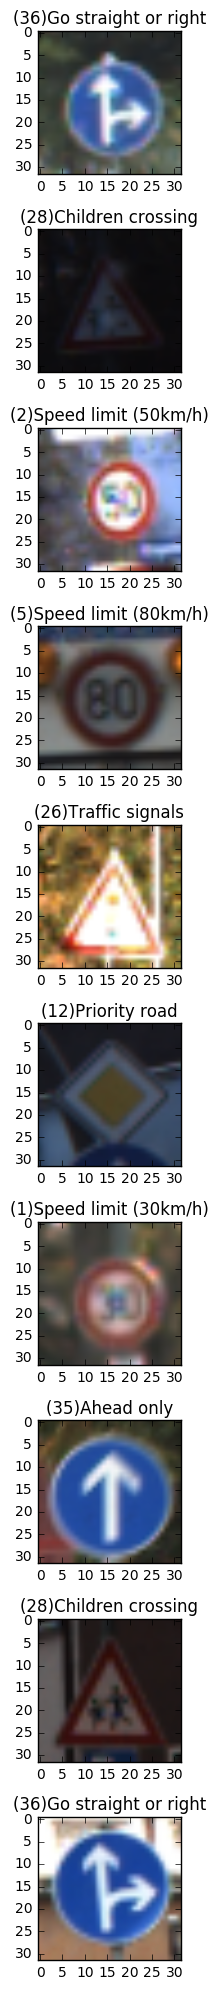

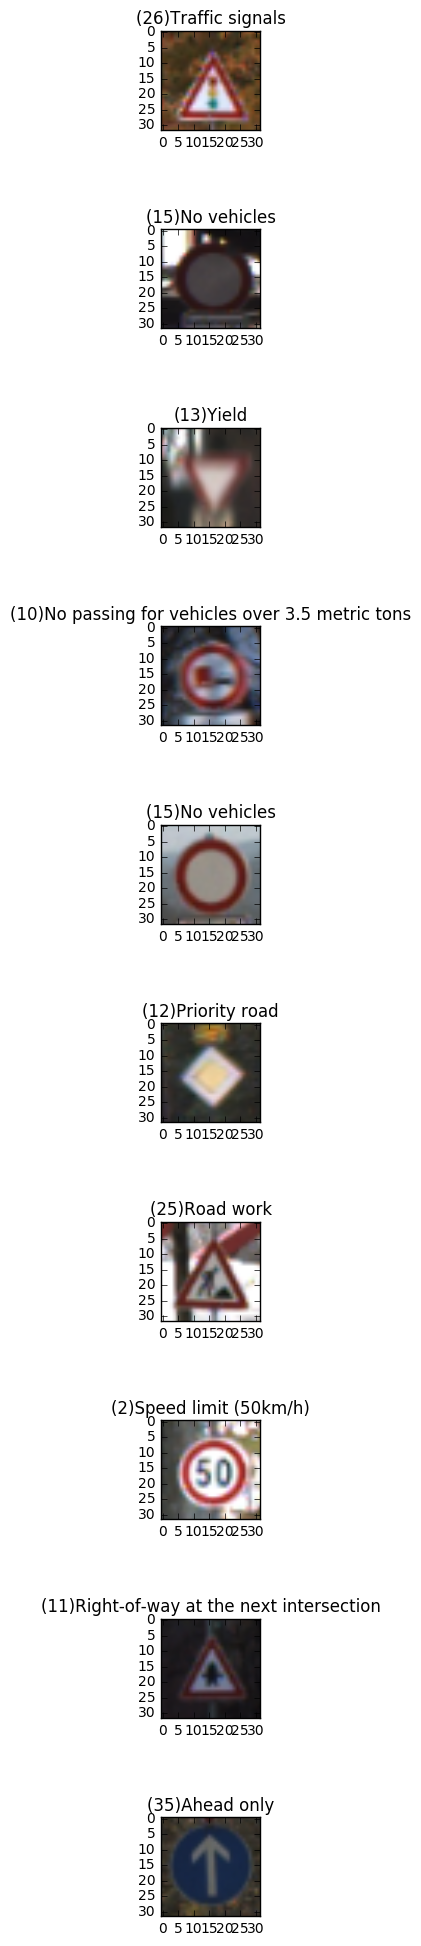

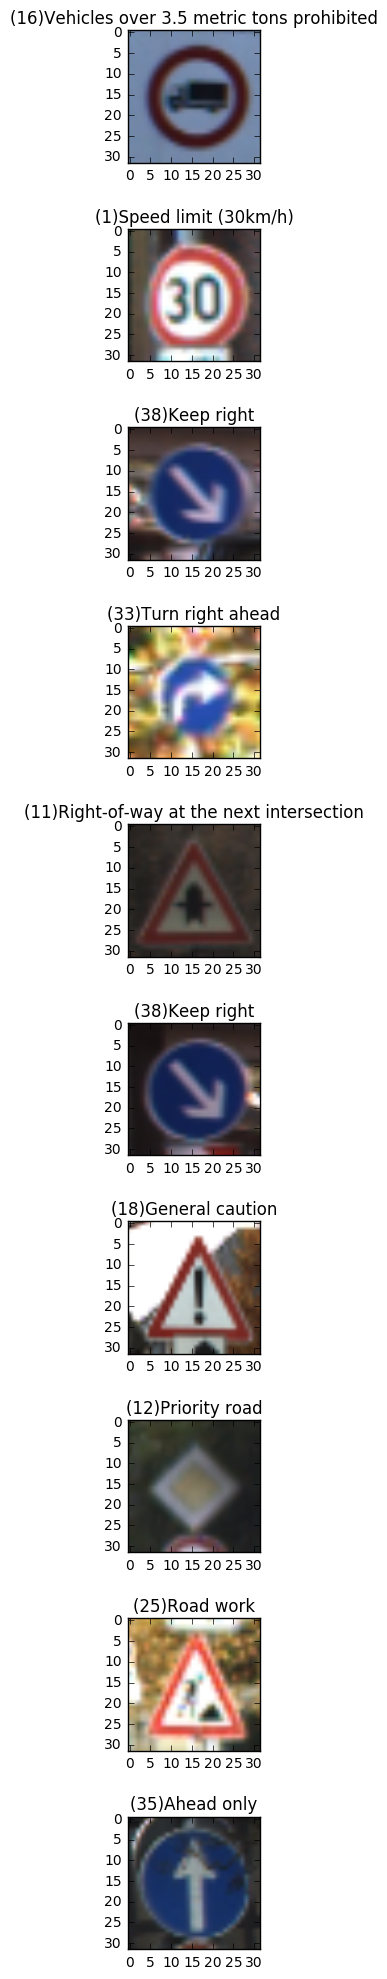

In [4]:
print("training data set samples")
original_data_explorer.sample_training_data(slice(0, 10)).show
print("validation data set samples")
original_data_explorer.sample_validation_data(slice(0, 10)).show
print("testing data set samples")
original_data_explorer.sample_testing_data(slice(0, 10)).show
        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

2017-01-07 13:17:54,150 - training data 31367
2017-01-07 13:18:26,264 - EPOCH 1 Validation loss = 1.144 accuracy = 0.701
2017-01-07 13:18:32,150 - Test loss = 1.439 accuracy = 0.646


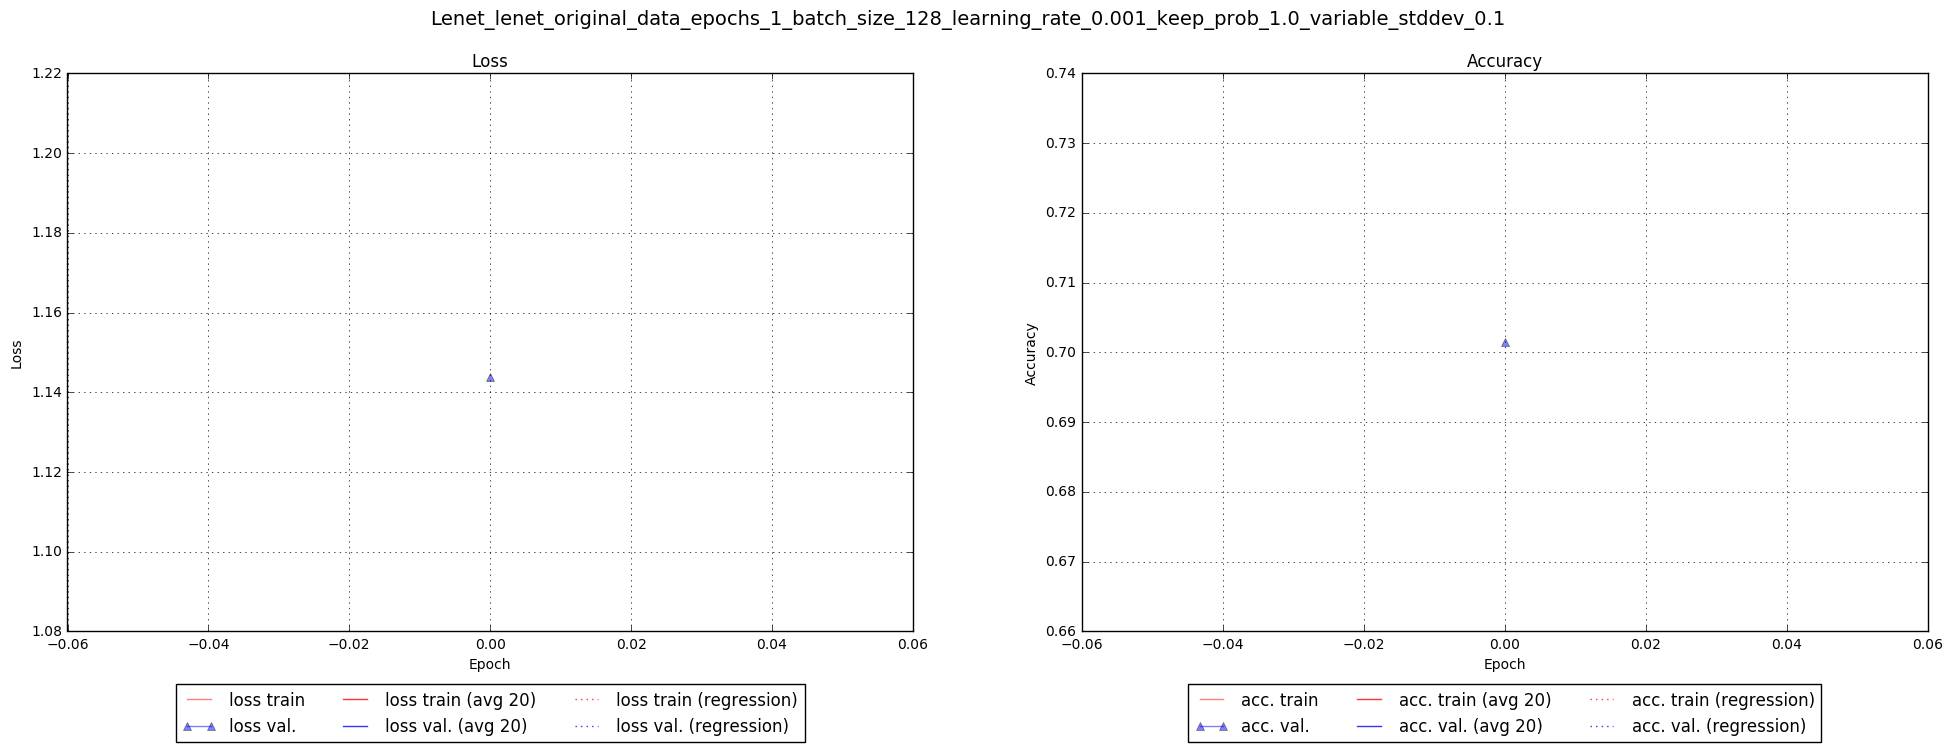

In [2]:
def test_basic_lenet_original_data():
    provider = original_data_provider
    lenet = Lenet(TrafficDataSets(provider),
                  name="original_data",
                  show_plot_window=False,
                  epochs=1, batch_size=128, variable_mean=0, variable_stddev=0.1,
                  learning_rate=0.001,
                  drop_out_keep_prob=1.0)
    lenet.train()
    Image(filename=lenet.file_name) 
    
test_basic_lenet_original_data()

2017-01-07 20:37:37,815 - training data 75612
2017-01-07 20:38:57,407 - EPOCH 1 training loss = 5.135 accuracy = 0.026 Validation loss = 3.713 accuracy = 0.044
2017-01-07 20:40:09,881 - EPOCH 2 training loss = 3.685 accuracy = 0.048 Validation loss = 3.332 accuracy = 0.155
2017-01-07 20:41:17,987 - EPOCH 3 training loss = 3.418 accuracy = 0.088 Validation loss = 2.823 accuracy = 0.252
2017-01-07 20:42:26,000 - EPOCH 4 training loss = 3.059 accuracy = 0.148 Validation loss = 2.459 accuracy = 0.303
2017-01-07 20:43:32,741 - EPOCH 5 training loss = 2.810 accuracy = 0.199 Validation loss = 2.104 accuracy = 0.389
2017-01-07 20:44:40,156 - EPOCH 6 training loss = 2.541 accuracy = 0.256 Validation loss = 1.838 accuracy = 0.458
2017-01-07 20:45:47,273 - EPOCH 7 training loss = 2.282 accuracy = 0.305 Validation loss = 1.609 accuracy = 0.499
2017-01-07 20:46:55,038 - EPOCH 8 training loss = 2.094 accuracy = 0.358 Validation loss = 1.406 accuracy = 0.567
2017-01-07 20:48:03,106 - EPOCH 9 training

KeyboardInterrupt: 

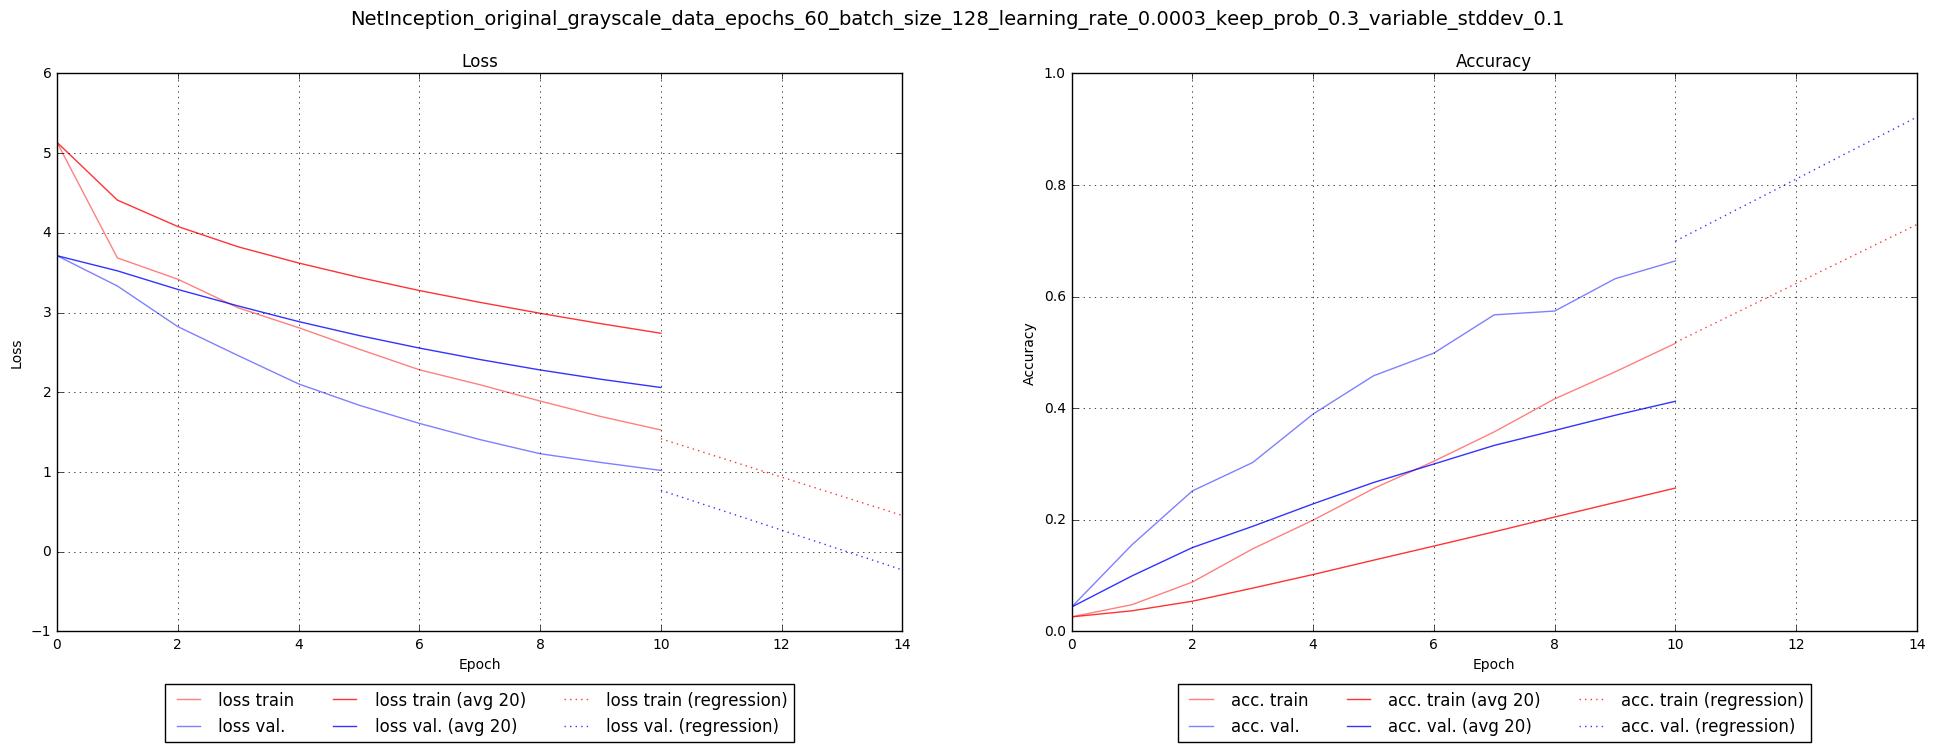

In [3]:
def test_basic_lenet_inception_augmented_data():
    """
    The basic one lenet
    GrayScale Images
    DropOut: NO
    """
    provider = rotated_data_provider
#     provider = grayscale(provider)
    lenet = NetInception(TrafficDataSets(provider),
                  name="original_grayscale_data",
                  epochs=60, batch_size=128, variable_mean=0, variable_stddev=0.1,
                  learning_rate=0.0003,
                  drop_out_keep_prob=0.3)
    lenet.train()
    Image(filename=lenet.file_name) 
    Image(filename=lenet.file_name_confusion_matrix) 
    
test_basic_lenet_inception_augmented_data()

In [ ]:
def test_basic_lenet_inception_rotate_2_data_94():
    provider = augment_data_random_rotate(2)
#     provider = grayscale(provider)
    provider = normalise_image_positive(provider)
    lenet = NetInception(TrafficDataSets(provider),
                  name="original_grayscale_data",
                  epochs=50, batch_size=128, variable_mean=0, variable_stddev=0.1,
                  learning_rate=0.0005,
                  drop_out_keep_prob=0.3)
    lenet.train()
    Image(filename=lenet.file_name) 
    Image(filename=lenet.file_name_confusion_matrix) 
    
test_basic_lenet_inception_rotate_2_data_94()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I have choose AdamOptimizer as it calculate portion of the data so that faster than full gradient, it uses moving averages of the parameters, training faster and has less chance to trap into local best result.
epochs are based on batch size, learning rate, drop out rate, etc.
I normally watch the training accuracy and validation accuracy curves, while they cound't improve or start to go down hill, that will be the right size of epochs
Batch size controlls how much data you give to AdamOptimizer for it's moving average, if it's too small, the loss curve will looks wiggle, but if it's too high, will take too long for training.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Lots of trial and error.
I think traffic sign has 43 classes and picture is more complex than hand written numbers. so that increase feature map (out put deepth) would help, also reduce max pooling stride size should help as well.
But from my testing, they didn't improve the accuracy too much.

I have draw myself training / valiation loss, training / validation accuracy curves, confus matrix


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.